In [1]:
#Importamos las librerias pandas, numpy y matplotlib respectivamente
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Carga desde un archivo .csv sin indice
data= pd.read_csv('Copenhagen_Denmark_sinvaloresnulos.csv') 

In [4]:
#Verificamos información del DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21722 entries, 0 to 21721
Data columns (total 52 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0.1                    21722 non-null  int64  
 1   Unnamed: 0                      21722 non-null  int64  
 2   name                            21722 non-null  object 
 3   last_scraped                    21722 non-null  object 
 4   description                     21722 non-null  object 
 5   neighborhood_overview           21722 non-null  object 
 6   host_id                         21722 non-null  int64  
 7   host_response_time              21722 non-null  object 
 8   host_response_rate              21722 non-null  float64
 9   host_acceptance_rate            21722 non-null  object 
 10  host_is_superhost               21722 non-null  object 
 11  host_listings_count             21722 non-null  float64
 12  host_verifications              

In [5]:
##copiamos el df
data1=data.copy()

In [6]:
##verificacion de los datos nulos
valores_nulos=data1.isnull().sum()
valores_nulos

Unnamed: 0.1                      0
Unnamed: 0                        0
name                              0
last_scraped                      0
description                       0
neighborhood_overview             0
host_id                           0
host_response_time                0
host_response_rate                0
host_acceptance_rate              0
host_is_superhost                 0
host_listings_count               0
host_verifications                0
host_has_profile_pic              0
host_identity_verified            0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
accommodates                      0
bathrooms                         0
bedrooms                          0
beds                              0
amenities                         0
price                             0
minimum_nights                    0
maximum_nights                    0
minimum_minimum_nights      

In [7]:
# Creo 2 dataframes para poder procesar los outliers
cuantitativas = data1.iloc[:, [
    8, 11, 16, 17, 19, 20, 21, 22, 24,
    25, 26, 27, 28, 29, 30, 31, 32,
    33, 34, 35, 36, 37, 38,
    41, 42, 43, 44, 45, 46, 47,
    50, 51]]

# Columnas cualitativas
cualitativas = data1.iloc[:, [
    2, 3, 4, 5, 6, 7, 9, 10, 12, 13, 14,
    15, 18, 23, 39, 40, 48, 49]]


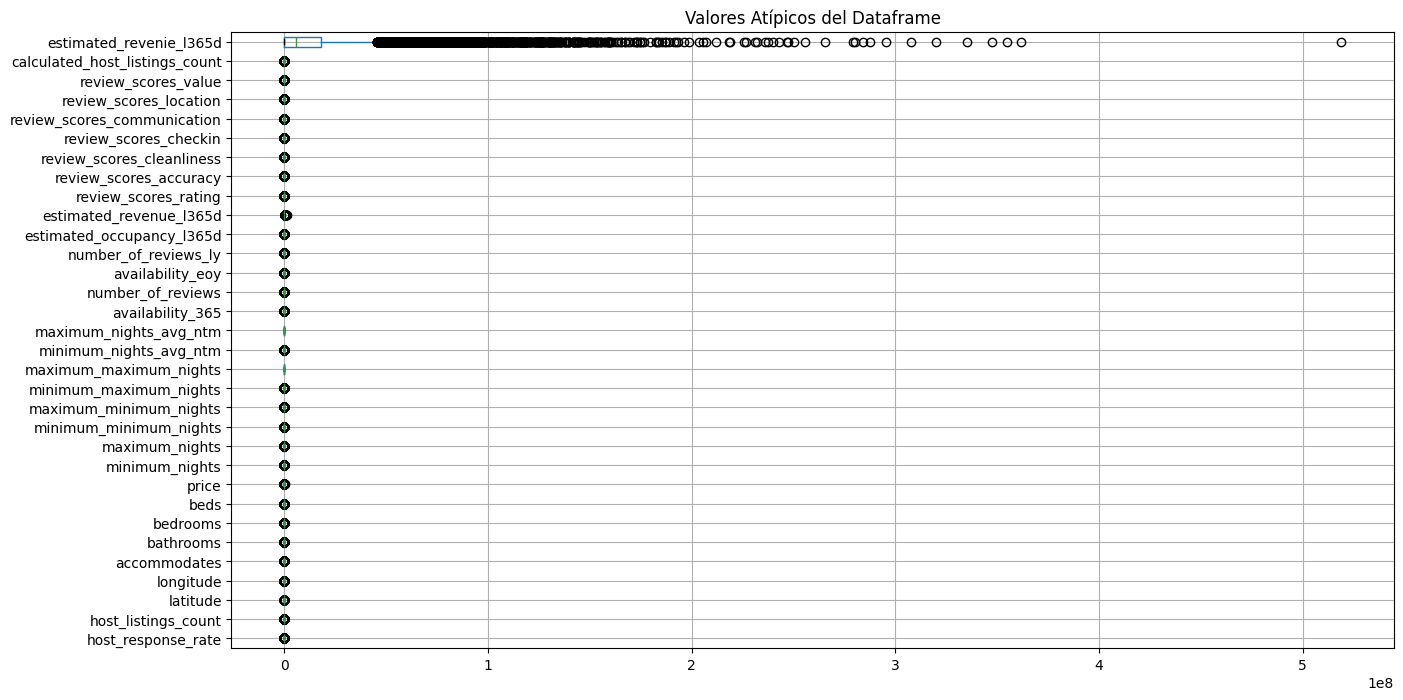

In [8]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig = plt.figure(figsize =(15, 8))
cuantitativas.boxplot(vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.show() #dibujamos el diagrama

In [9]:
#Método aplicando desviación estandar. Encuentro los valores extremos
y=cuantitativas
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

Limite superior permitido host_response_rate                1.450886e+02
host_listings_count               1.240645e+02
latitude                          5.573784e+01
longitude                         1.265226e+01
accommodates                      8.252334e+00
bathrooms                         1.825818e+00
bedrooms                          4.245923e+00
beds                              5.138317e+00
price                             4.275813e+03
minimum_nights                    5.748558e+01
maximum_nights                    1.484814e+03
minimum_minimum_nights            5.369279e+01
maximum_minimum_nights            5.643983e+01
minimum_maximum_nights            1.686747e+03
maximum_maximum_nights            1.712795e+03
minimum_nights_avg_ntm            5.545009e+01
maximum_nights_avg_ntm            1.686595e+03
availability_365                  4.198358e+02
number_of_reviews                 1.524006e+02
availability_eoy                  3.327910e+02
number_of_reviews_ly              

In [10]:
#Obtenemos datos y los outliers se convierten en nulos en el DataFrame
data3= cuantitativas[(y<=Limite_Superior)&(y>=Limite_Inferior)]
data3

,host_response_rate,host_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,...,estimated_revenue_l365d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,estimated_revenie_l365d
0,90.660123,1.0,55.666602,12.555283,6.0,1.0,4.0,3.0,1356.950431,3.0,...,0.000000,4.88,4.82,4.88,4.87,4.82,4.80,4.53,1.0,0.000000e+00
1,100.000000,3.0,55.672638,12.552493,4.0,1.0,2.0,2.0,1356.950431,3.0,...,24425.107755,4.91,4.96,4.93,4.88,4.91,4.89,4.70,2.0,8.915164e+06
2,90.660123,1.0,55.711760,12.570910,4.0,1.0,2.0,2.0,1356.950431,NaN,...,0.000000,4.57,4.75,4.50,5.00,5.00,4.50,4.50,1.0,0.000000e+00
3,100.000000,1.0,55.684288,12.573019,6.0,1.0,2.0,2.0,2550.000000,7.0,...,NaN,4.94,4.82,4.89,4.82,5.00,4.93,4.89,1.0,NaN
4,100.000000,1.0,55.665070,12.583150,4.0,NaN,2.0,2.0,2168.000000,2.0,...,NaN,4.84,4.83,4.98,4.90,4.94,4.74,4.66,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21717,100.000000,1.0,55.708982,12.530840,4.0,1.0,1.0,2.0,520.000000,1.0,...,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.0,0.000000e+00
21718,90.660123,1.0,55.676890,12.589630,2.0,1.0,1.0,1.0,2700.000000,5.0,...,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.0,0.000000e+00
21719,100.000000,NaN,55.666922,12.549626,4.0,1.0,2.0,2.0,2026.000000,1.0,...,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,0.000000e+00
21720,100.000000,NaN,55.703871,12.587086,3.0,1.0,1.0,2.0,1620.000000,1.0,...,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,0.000000e+00


In [11]:
#Corroboramos valores nulos del dataframe4
valores_nulos=data3.isnull().sum()
valores_nulos

host_response_rate                780
host_listings_count               380
latitude                          100
longitude                          37
accommodates                      168
bathrooms                         977
bedrooms                          156
beds                              240
price                             117
minimum_nights                    129
maximum_nights                      0
minimum_minimum_nights            117
maximum_minimum_nights            151
minimum_maximum_nights              0
maximum_maximum_nights              0
minimum_nights_avg_ntm            134
maximum_nights_avg_ntm              0
availability_365                    0
number_of_reviews                 291
availability_eoy                    0
number_of_reviews_ly              324
estimated_occupancy_l365d         677
estimated_revenue_l365d           476
review_scores_rating                0
review_scores_accuracy              0
review_scores_cleanliness           0
review_score

In [13]:
#Reemplazamos valores atípicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe
data_clean=data3.copy()
data_clean=data_clean.fillna(round(data3.mean(),1))
data_clean

,host_response_rate,host_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,...,estimated_revenue_l365d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,estimated_revenie_l365d
0,90.660123,1.0,55.666602,12.555283,6.0,1.0,4.0,3.0,1356.950431,3.0,...,0.000000,4.88,4.82,4.88,4.87,4.82,4.80,4.53,1.0,0.000000e+00
1,100.000000,3.0,55.672638,12.552493,4.0,1.0,2.0,2.0,1356.950431,3.0,...,24425.107755,4.91,4.96,4.93,4.88,4.91,4.89,4.70,2.0,8.915164e+06
2,90.660123,1.0,55.711760,12.570910,4.0,1.0,2.0,2.0,1356.950431,3.7,...,0.000000,4.57,4.75,4.50,5.00,5.00,4.50,4.50,1.0,0.000000e+00
3,100.000000,1.0,55.684288,12.573019,6.0,1.0,2.0,2.0,2550.000000,7.0,...,32386.100000,4.94,4.82,4.89,4.82,5.00,4.93,4.89,1.0,1.182092e+07
4,100.000000,1.0,55.665070,12.583150,4.0,1.0,2.0,2.0,2168.000000,2.0,...,32386.100000,4.84,4.83,4.98,4.90,4.94,4.74,4.66,1.0,1.182092e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21717,100.000000,1.0,55.708982,12.530840,4.0,1.0,1.0,2.0,520.000000,1.0,...,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.0,0.000000e+00
21718,90.660123,1.0,55.676890,12.589630,2.0,1.0,1.0,1.0,2700.000000,5.0,...,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.0,0.000000e+00
21719,100.000000,1.7,55.666922,12.549626,4.0,1.0,2.0,2.0,2026.000000,1.0,...,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.5,0.000000e+00
21720,100.000000,1.7,55.703871,12.587086,3.0,1.0,1.0,2.0,1620.000000,1.0,...,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.5,0.000000e+00


In [14]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=data_clean.isnull().sum()
valores_nulos

host_response_rate                0
host_listings_count               0
latitude                          0
longitude                         0
accommodates                      0
bathrooms                         0
bedrooms                          0
beds                              0
price                             0
minimum_nights                    0
maximum_nights                    0
minimum_minimum_nights            0
maximum_minimum_nights            0
minimum_maximum_nights            0
maximum_maximum_nights            0
minimum_nights_avg_ntm            0
maximum_nights_avg_ntm            0
availability_365                  0
number_of_reviews                 0
availability_eoy                  0
number_of_reviews_ly              0
estimated_occupancy_l365d         0
estimated_revenue_l365d           0
review_scores_rating              0
review_scores_accuracy            0
review_scores_cleanliness         0
review_scores_checkin             0
review_scores_communication 

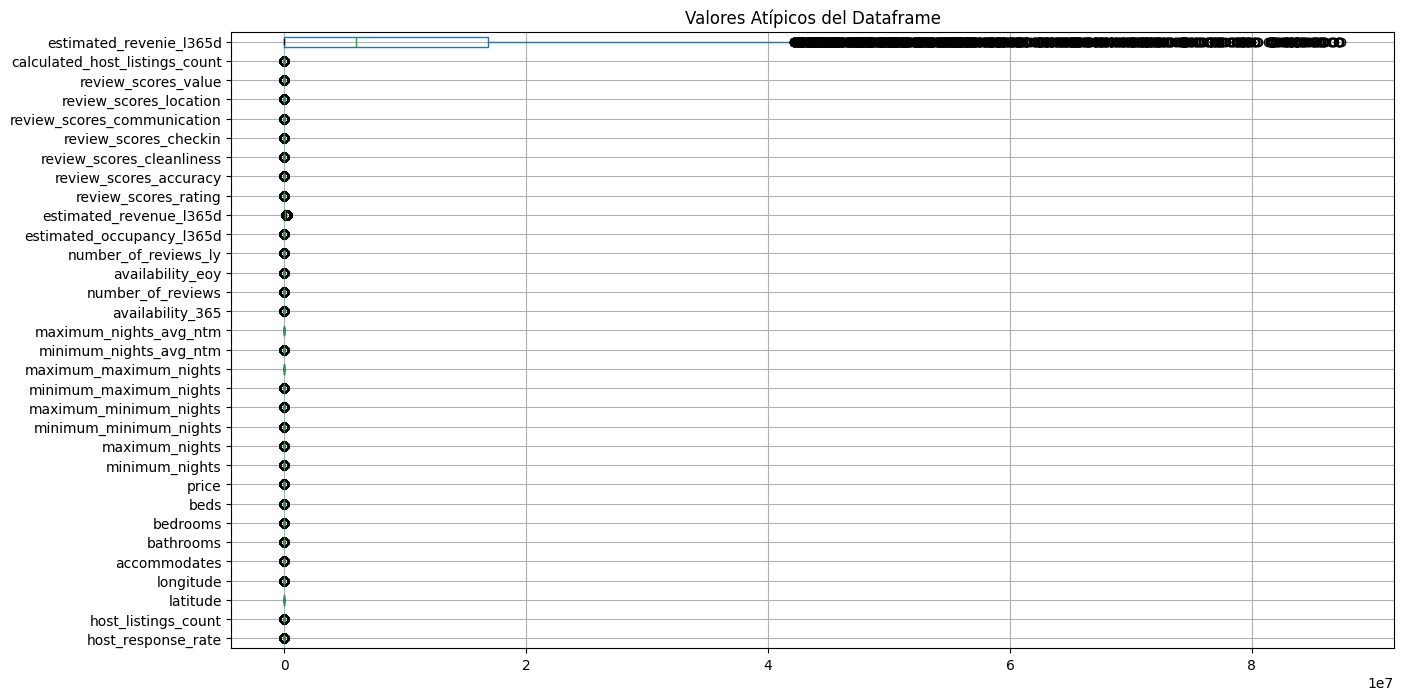

In [15]:
##comprobacion dif 

fig = plt.figure(figsize =(15, 8))
data_clean.boxplot(vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.show() #dibujamos el diagrama

In [16]:
# Unimos el dataframe cuantitativo limpio con el dataframe cualitativo

Datos_limpios = pd.concat([cualitativas, data_clean], axis=1)
Datos_limpios

,name,last_scraped,description,neighborhood_overview,host_id,host_response_time,host_acceptance_rate,host_is_superhost,host_verifications,host_has_profile_pic,...,estimated_revenue_l365d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,estimated_revenie_l365d
0,"Beautiful, spacious, central, renovated Penthouse",24/03/2025,"Welcome to our home, we hope you will enjoy Wo...","What else is nearby?<br />To be honest, We thi...",129976,within a few days or more,0,f,"['email', 'phone']",t,...,0.000000,4.88,4.82,4.88,4.87,4.82,4.80,4.53,1.0,0.000000e+00
1,"155 m2 artist flat on Vesterbro, with 2 bathrooms",24/03/2025,You enter a narrow entrance and feel the good ...,"Værnedamsvej area is super hip area, we call i...",140105,within a few hours,100%,t,"['email', 'phone']",t,...,24425.107755,4.91,4.96,4.93,4.88,4.91,4.89,4.70,2.0,8.915164e+06
2,Cozy flat for Adults/Quiet for kids,24/03/2025,Our flat is placed in a Central AND Quiet neig...,No tiene descripción del vecindario,142143,within a few days or more,0,f,"['email', 'phone']",t,...,0.000000,4.57,4.75,4.50,5.00,5.00,4.50,4.50,1.0,0.000000e+00
3,0 min. from everything in Cph.,24/03/2025,It doesn't get more central than this. Histori...,Area: <br />This is the eye of Cph. right betw...,122489,within a few hours,100%,t,"['email', 'phone']",t,...,32386.100000,4.94,4.82,4.89,4.82,5.00,4.93,4.89,1.0,1.182092e+07
4,Stylish apartment in central Copenhagen,24/03/2025,"Big, bright, airy and attractive apartment dec...",The flat is excellently located in Islands Bry...,167511,within a few hours,63%,t,"['email', 'phone']",t,...,32386.100000,4.84,4.83,4.98,4.90,4.94,4.74,4.66,1.0,1.182092e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21717,Cozy copenhagen apartment,23/03/2025,"Apartment in the quiet area of Nordvest, close...",No tiene descripción del vecindario,593936121,within a few days or more,20%,f,['phone'],f,...,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.0,0.000000e+00
21718,Kopenhagen,24/03/2025,No tiene descripción,No tiene descripción del vecindario,158835175,within a few days or more,0,f,"['email', 'phone']",t,...,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.0,0.000000e+00
21719,Vesterbro - 2 Br - Cozy - Metro - Tivoli -4 Pe...,24/03/2025,== Rooms ==<br />Main Floor:<br /><br />Living...,No tiene descripción del vecindario,187610263,within a few days or more,99%,f,"['email', 'phone']",t,...,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.5,0.000000e+00
21720,Østerbro - 1 Br - 3 People- Close To Metro (16...,24/03/2025,== Rooms ==<br />Main Floor:<br /><br />Living...,No tiene descripción del vecindario,187610263,within a few days or more,99%,f,"['email', 'phone']",t,...,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.5,0.000000e+00


In [17]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=Datos_limpios.isnull().sum()
valores_nulos

name                              0
last_scraped                      0
description                       0
neighborhood_overview             0
host_id                           0
host_response_time                0
host_acceptance_rate              0
host_is_superhost                 0
host_verifications                0
host_has_profile_pic              0
host_identity_verified            0
neighbourhood                     0
room_type                         0
amenities                         0
first_review                      0
last_review                       0
license                           0
instant_bookable                  0
host_response_rate                0
host_listings_count               0
latitude                          0
longitude                         0
accommodates                      0
bathrooms                         0
bedrooms                          0
beds                              0
price                             0
minimum_nights              

In [18]:
#Convertir DataFrame a CSV
Datos_limpios.to_csv("Conpenhagen_limpio.csv")